**No warnings**

In [1]:
!pip install shutup

In [2]:
import shutup; shutup.please()

**Kaggle API token for Google Colab**

**The following steps are only for running notebook in Google Colab Environment**

In [3]:
#!pip install kaggle

In [4]:
#!mkdir ~/.kaggle
#!cp /content/kaggle.json ~/.kaggle/kaggle.json
#!chmod 600 /root/.kaggle/kaggle.json

In [5]:
#!unzip *.zip

# Importing Required Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn import  metrics
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor



from scipy import ndimage

import plotly.express as px

%matplotlib inline

**Checking our data**

In [7]:
dataframe = pd.read_csv('../input/medias-cost-prediction-in-foodmart/media prediction and its cost.csv')
dataframe.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


**Descriptive Statistics**

In [8]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),60428.0,6.541031,3.463047,0.5100,3.81,5.9400,8.670000,22.9200
store_cost(in millions),60428.0,2.619460,1.453009,0.1632,1.50,2.3856,3.484025,9.7265
unit_sales(in millions),60428.0,3.093169,0.827677,1.0000,3.00,3.0000,4.000000,6.0000
total_children,60428.0,2.533875,1.490165,0.0000,1.00,3.0000,4.000000,5.0000
avg_cars_at home(approx),60428.0,2.200271,1.109644,0.0000,1.00,2.0000,3.000000,4.0000
num_children_at_home,60428.0,0.829351,1.303424,0.0000,0.00,0.0000,1.000000,5.0000
avg_cars_at home(approx).1,60428.0,2.200271,1.109644,0.0000,1.00,2.0000,3.000000,4.0000
SRP,60428.0,2.115258,0.932829,0.5000,1.41,2.1300,2.790000,3.9800
gross_weight,60428.0,13.806433,4.622693,6.0000,9.70,13.6000,17.700000,21.9000
net_weight,60428.0,11.796289,4.682986,3.0500,7.71,11.6000,16.000000,20.8000


**As we can see our dataset constists of many columns(continuous values) of variables** 

# Data Visualization


**Checking for nulls using Missingno**

The Missingno python library helps to visualise the missing values in a pandas dataframe.

It helps for quick visual summary of the completeness/incompleteness of the dataset


In [9]:
!pip install missingno

In [10]:
import missingno as msno

**Plotting a Bar Chart of the missing values**

<AxesSubplot:>

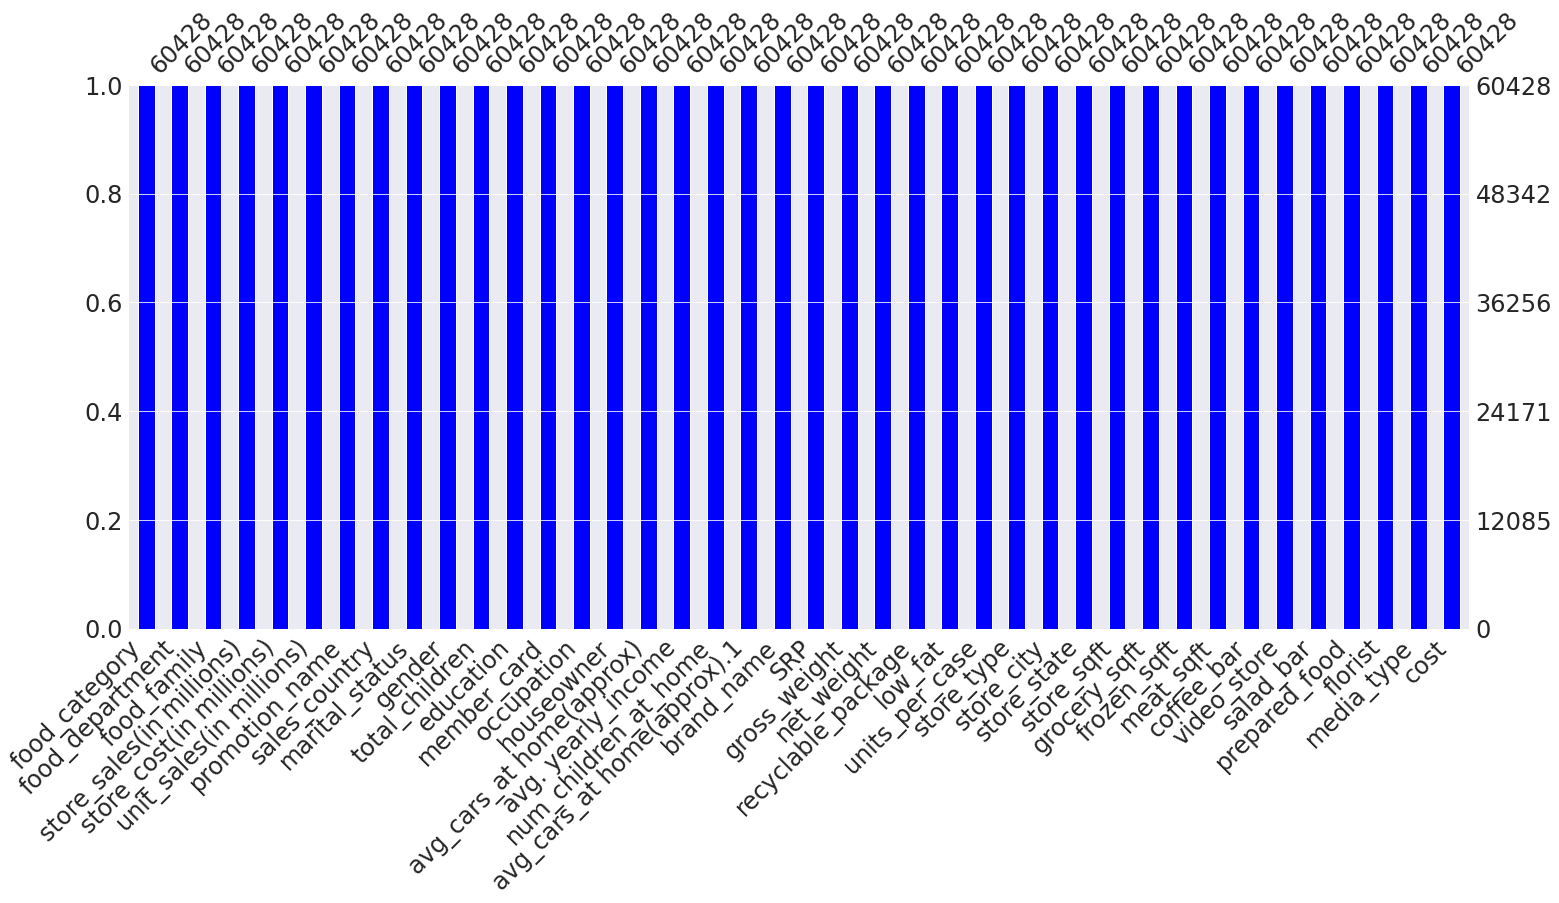

In [11]:
msno.bar(dataframe,fontsize = 24, color = 'blue')

**Heatmap of missing values**

<AxesSubplot:>

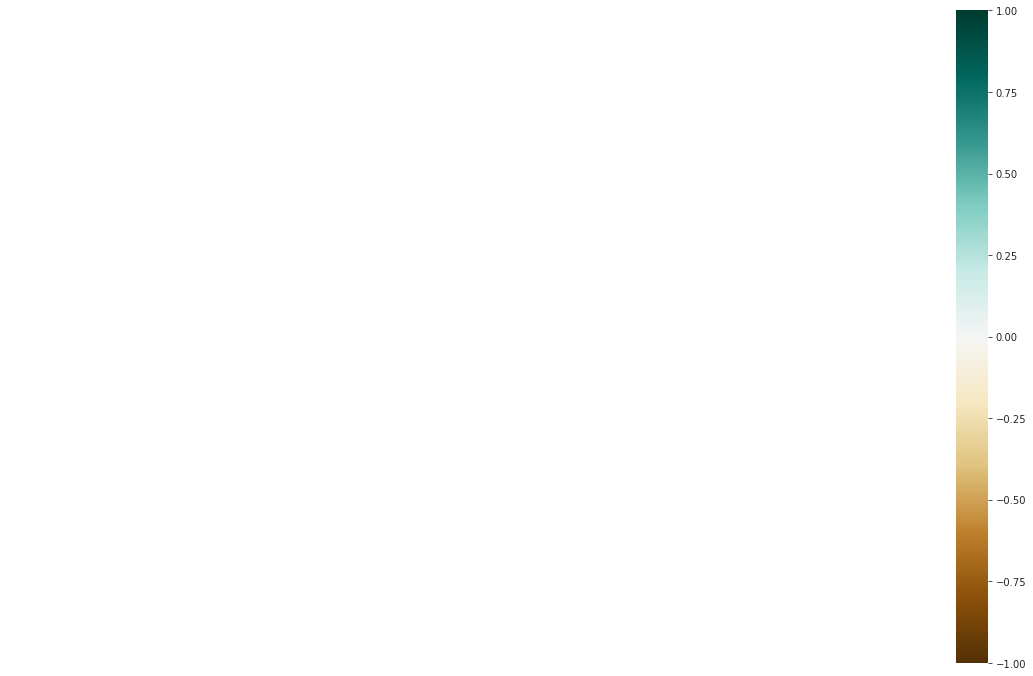

In [12]:
msno.heatmap(dataframe,fontsize = 24, cmap = 'BrBG')

**Count Plot for Cost**

<AxesSubplot:xlabel='cost', ylabel='count'>

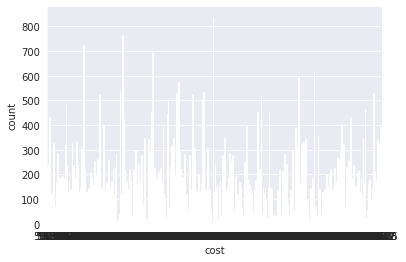

In [13]:
sns.countplot(x = 'cost',data = dataframe, color = 'blue')

**Pie Chart for Food Department**

<AxesSubplot:title={'center':'Food Department Pie Chart'}, ylabel='food_department'>

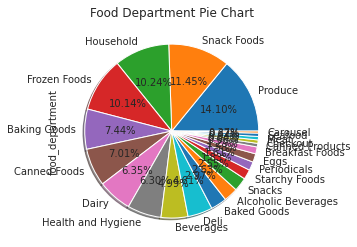

In [14]:
plt.title("Food Department Pie Chart")
dataframe["food_department"].value_counts().plot(kind="pie",autopct='%.2f%%',
    shadow=True)

**Count Plot for Country of sale**

<AxesSubplot:xlabel='sales_country', ylabel='count'>

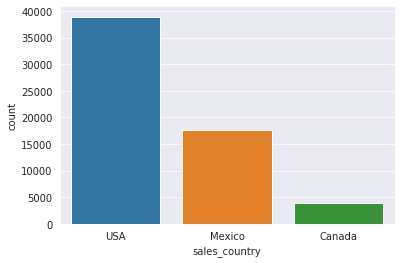

In [15]:
sns.countplot(x = 'sales_country',data = dataframe)

**We can see majority sales is done in the USA**

**Distribution of Cost**

<AxesSubplot:xlabel='cost', ylabel='Density'>

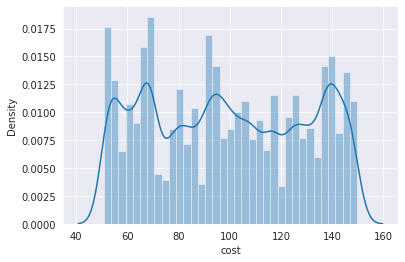

In [16]:
sns.distplot(dataframe['cost'])

**Correlation Heatmap of Variables**

In [17]:
corr=dataframe.corr()
print(corr)

                            store_sales(in millions)  store_cost(in millions)  \
store_sales(in millions)                    1.000000                 0.954685   
store_cost(in millions)                     0.954685                 1.000000   
unit_sales(in millions)                     0.503482                 0.480087   
total_children                              0.083313                 0.079058   
avg_cars_at home(approx)                    0.004498                 0.002865   
num_children_at_home                        0.032437                 0.027576   
avg_cars_at home(approx).1                  0.004498                 0.002865   
SRP                                         0.833478                 0.795880   
gross_weight                                0.036179                 0.034237   
net_weight                                  0.032014                 0.030257   
recyclable_package                          0.034293                 0.030213   
low_fat                     

<AxesSubplot:>

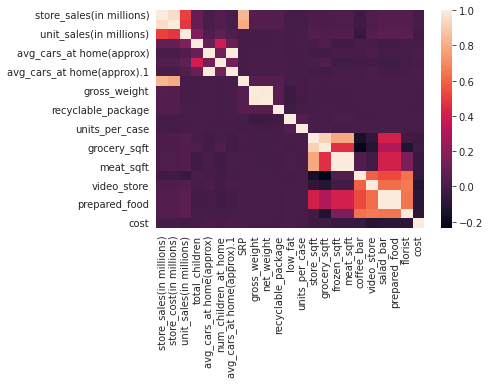

In [18]:
sns.heatmap(corr)

**Unit sales with respect to food departments**

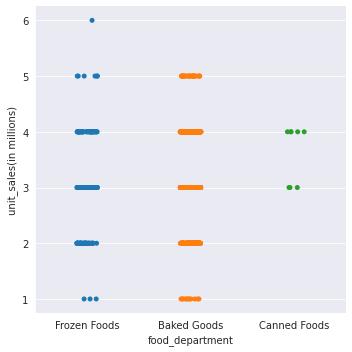

In [19]:
sns.catplot(data=dataframe[:1000],x='food_department',y='unit_sales(in millions)')

**Inferences -**

* Data doesn't contain any missing values.
* Data is evenly distributed.
* Data contains no duplicate values.
* The data seems to be Normally distributed. 
* Majority of sales is done in the USA.

**Dropping columns**

In [20]:
dataframe = dataframe.drop(columns=['food_category', 'food_department', 'food_family', 'gender', 'marital_status',
                         'brand_name', 'avg. yearly_income', 'education', 'member_card', 'houseowner', 
                          'sales_country', 'occupation','recyclable_package', 'low_fat'])
dataframe.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,7.36,2.7232,4.0,Bag Stuffers,1.0,1.0,1.0,1.0,1.84,19.70,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,5.52,2.5944,3.0,Cash Register Lottery,0.0,4.0,0.0,4.0,1.84,19.70,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,3.68,1.3616,2.0,High Roller Savings,4.0,1.0,0.0,1.0,1.84,19.70,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,3.68,1.1776,2.0,Cash Register Lottery,2.0,2.0,2.0,2.0,1.84,19.70,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,4.08,1.4280,3.0,Double Down Sale,0.0,2.0,0.0,2.0,1.36,7.12,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


**Ordinal Encoder for Target**

In [21]:
encoder = OrdinalEncoder()
final_dataframe = encoder.fit_transform(dataframe.drop(columns='cost'))

**Breaking down into X and y**

In [22]:
X=final_dataframe
y=dataframe['cost']

**Creating Training and Validation sets**

In [23]:
train_X,val_X,train_y,val_y=train_test_split(X,y,test_size=0.2)

In [24]:
print("Shape of Training X :",train_X.shape)
print("Shape of Validation X :",val_X.shape)

Shape of Training X : (48342, 25)
Shape of Validation X : (12086, 25)


In [25]:
print("Shape of Training y :",train_y.shape)
print("Shape of Validation y :",val_y.shape)

Shape of Training y : (48342,)
Shape of Validation y : (12086,)


# Model Building

**Approaching the Problem in the same way**

**Going from simple ML Models towards more complex ones**

**Linear Regression**

In [26]:
lr = LinearRegression()
lr.fit(train_X,train_y)
print('Attempting to fit Linear Regressor')

Attempting to fit Linear Regressor


In [27]:
%%time
y_pred_val_lr = lr.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_lr))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_lr))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_lr)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))
print("\n")

MAE on Validation set : 25.465685369310012


MSE on Validation set : 874.5636327272956


RMSE on Validation set : 5.046353670652703


R2 Score on Validation set : 0.03924746638021437


CPU times: user 35.3 ms, sys: 60 ms, total: 95.3 ms
Wall time: 25.8 ms


**Support Vector Regressor**

In [28]:
svm = SVR()
svm.fit(train_X,train_y)
print('Attempting to fit Support Vector Regressor')

Attempting to fit Support Vector Regressor


In [29]:
%%time
y_pred_val_svm = svm.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_svm))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_svm))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_svm)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_svm))
print("\n")

MAE on Validation set : 26.16104577463748


MSE on Validation set : 913.5342662777522


RMSE on Validation set : 5.114786972556871


R2 Score on Validation set : -0.0035637522884723882


CPU times: user 47.5 s, sys: 3.38 ms, total: 47.5 s
Wall time: 47.5 s


**Decision Tree Regressor**

In [30]:
dc = DecisionTreeRegressor(random_state = 0)
dc.fit(train_X,train_y)
print('Attempting to fit Decision Tree Regressor')

Attempting to fit Decision Tree Regressor


In [31]:
%%time
y_pred_val_dc = dc.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_dc))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_dc))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_dc)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_dc))
print("\n")


MAE on Validation set : 0.06597054443177393


MSE on Validation set : 2.3411207016382596


RMSE on Validation set : 0.2568473173536643


R2 Score on Validation set : 0.9974281601001467


CPU times: user 5.01 ms, sys: 2.02 ms, total: 7.03 ms
Wall time: 5.42 ms


**Random Forest Regressor**

In [32]:
rf = RandomForestRegressor()
rf.fit(train_X,train_y)
print('Attempting to fit Random Forest Regressor')

Attempting to fit Random Forest Regressor


In [33]:
%%time
y_pred_val_rf = rf.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_rf))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_rf))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_rf)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_rf))
print("\n")


MAE on Validation set : 0.09058383253367143


MSE on Validation set : 1.877825492085053


RMSE on Validation set : 0.30097148126304496


R2 Score on Validation set : 0.9979371133995243


CPU times: user 173 ms, sys: 1.98 ms, total: 175 ms
Wall time: 173 ms


**MLP Regressor**

In [34]:
mlp = MLPRegressor(max_iter = 300)
mlp.fit(train_X,train_y)
print('Attempting to fit MLP Regressor')

Attempting to fit MLP Regressor


In [35]:
%%time
y_pred_val_mlp = mlp.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_mlp))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_mlp))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_mlp)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_mlp))
print("\n")


MAE on Validation set : 25.23978003779959


MSE on Validation set : 867.1935104978782


RMSE on Validation set : 5.02392078339215


R2 Score on Validation set : 0.04734391967420615


CPU times: user 159 ms, sys: 105 ms, total: 264 ms
Wall time: 68.1 ms


**Gradient Boosting Regressor**

In [36]:
gbc = GradientBoostingRegressor()
gbc.fit(train_X,train_y)
print('Attempting to fit Gradient Boosting Regressor')

Attempting to fit Gradient Boosting Regressor


In [37]:
%%time
y_pred_val_gbc = gbc.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_gbc))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_gbc))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_gbc)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_gbc))
print("\n")


MAE on Validation set : 16.248030363328386


MSE on Validation set : 393.50450224623927


RMSE on Validation set : 4.03088456338412


R2 Score on Validation set : 0.5677153343949384


CPU times: user 25.3 ms, sys: 4.64 ms, total: 30 ms
Wall time: 28 ms


**Light GBM Regressor**

In [38]:
lgbm = LGBMRegressor()
lgbm.fit(train_X,train_y)
print('Attempting to fit Light GBM Regressor')

Attempting to fit Light GBM Regressor


In [39]:
%%time
y_pred_val_lgbm = lgbm.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_lgbm))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_lgbm))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_lgbm)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lgbm))
print("\n")


MAE on Validation set : 3.1221111865777678


MSE on Validation set : 19.096316712987537


RMSE on Validation set : 1.7669496842235684


R2 Score on Validation set : 0.9790217269753206


CPU times: user 118 ms, sys: 579 µs, total: 118 ms
Wall time: 30.4 ms


In [40]:
print('Logistic Regression R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))
print('SVR R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_svm))
print('Decision Tree Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_dc))
print('Random Forest Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_rf))
print('MLP Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_mlp))
print('Gradient Boosting R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_gbc))
print('Light GBM R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lgbm))

Logistic Regression R2 Score on Validation set : 0.03924746638021437
SVR R2 Score on Validation set : -0.0035637522884723882
Decision Tree Regressor R2 Score on Validation set : 0.9974281601001467
Random Forest Regressor R2 Score on Validation set : 0.9979371133995243
MLP Regressor R2 Score on Validation set : 0.04734391967420615
Gradient Boosting R2 Score on Validation set : 0.5677153343949384
Light GBM R2 Score on Validation set : 0.9790217269753206


**As we can see our top 3 Models(On the basis of R2 score) are -**

1. Random Forest Regressor

2. Decision Tree Regressor

3. Light GBM Regressor

**Future Scope -**

* Create a test set for ruling out if tree based regression models are overfitting.
* More feature engineering from eliminated variables.
* Trying Hyperparameter and Model tuning of existing models to achieve better performance.